In [1]:
from sample_recorder import Trace
import matplotlib.pyplot as plt
import math

In [2]:
trace = Trace.deserialize(open('../trace.blob', 'rb').read(), progress_bar=True)

100%|██████████| 43617792/43617792 [00:02<00:00, 16390649.16it/s]


In [11]:
episode_info = {}
for t in trace.samples:
    x = t.entities['Spaceship'][0][0]
    y = t.entities['Spaceship'][0][1]
    if t.step == 0:
        episode_info[t.episode] = {'xpos': x, 'ypos': y, 'reward': 0, 'angle': math.atan2(y, x), 'trajectory': []}
    episode_info[t.episode]['reward'] += t.reward
    episode_info[t.episode]['trajectory'].append((x, y))

In [12]:
last_half = list(episode_info.values())[:1500]

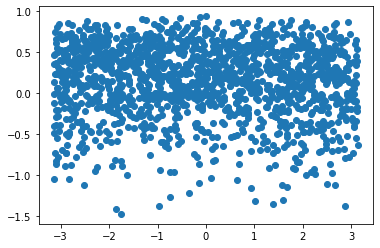

In [13]:
# Plot scatter plot of reward vs angle
plt.scatter(list(map(lambda x: x['angle'], last_half)), list(map(lambda x: x['reward'], last_half)))

IndexError: list index out of range

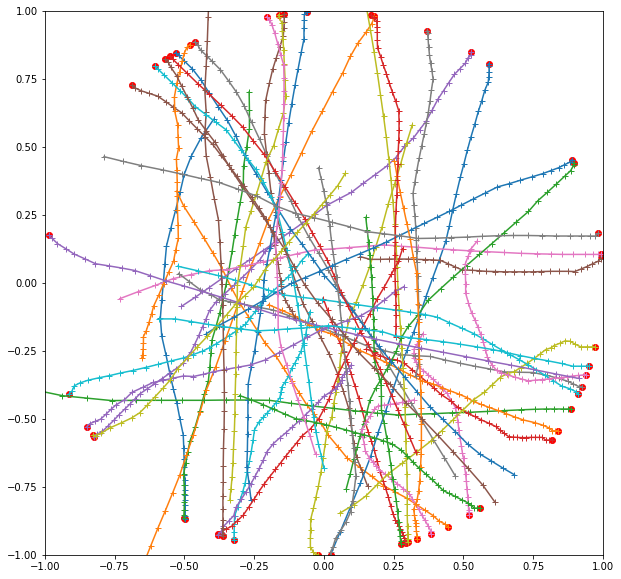

In [34]:
# Plot trajectory of episode 2000
first_episode = 3000
for episode in range(first_episode, first_episode + 50):
    plt.plot(*zip(*episode_info[episode]['trajectory']), '-+')
    # Mark the initial position
    plt.scatter(episode_info[episode]['xpos'], episode_info[episode]['ypos'], c='r')
    # Set limit between -1 and 1
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    # Increase the size of the figure
    plt.gcf().set_size_inches(10, 10)
